<a href="https://colab.research.google.com/github/juHa1205/NLP_2023/blob/main/1217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.DataFrame(columns=['calory','breakfast','lunch','dinner','exercise','body_shape'])

In [ ]:
df.loc[0] = [1200,1,0,0,2,'Skinny']
df.loc[1] = [2800,1,1,1,2,'Normal']
df.loc[2] = [3500,2,2,1,0,'Fat']
df.loc[3] = [1400,0,1,0,3,'Skinny']
df.loc[4] = [5000,2,2,2,0,'Fat']
df.loc[5] = [1300,0,0,1,2,'Skinny']
df.loc[6] = [3000,1,0,1,1,'Normal']
df.loc[7] = [4000,2,2,2,0,'Fat']
df.loc[8] = [2600,0,2,0,0,'Normal']
df.loc[9] = [3000,1,2,1,1,'Fat']

In [ ]:
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,2,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [ ]:
X=df[['calory','breakfast','lunch','dinner','exercise']]

In [ ]:
X.head()

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,2
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0


In [ ]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [ ]:
print(x_std)

[[-1.35205803  0.         -1.3764944  -1.28571429  0.86204366]
 [ 0.01711466  0.         -0.22941573  0.14285714  0.86204366]
 [ 0.61612771  1.29099445  0.91766294  0.14285714 -1.05360891]
 [-1.18091145 -1.29099445 -0.22941573 -1.28571429  1.81986994]
 [ 1.89972711  1.29099445  0.91766294  1.57142857 -1.05360891]
 [-1.26648474 -1.29099445 -1.3764944   0.14285714  0.86204366]
 [ 0.18826125  0.         -1.3764944   0.14285714 -0.09578263]
 [ 1.04399418  1.29099445  0.91766294  1.57142857 -1.05360891]
 [-0.15403193 -1.29099445  0.91766294 -1.28571429 -1.05360891]
 [ 0.18826125  0.          0.91766294  0.14285714 -0.09578263]]


In [ ]:
Y=df[['body_shape']]

In [ ]:
Y.head(10)

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


In [ ]:
import numpy as np
features = x_std.T
covariance_matrix = np.cov(features)

In [ ]:
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.89067927]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.68697134]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.75688367]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.59294008]
 [-0.89067927 -0.68697134 -0.75688367 -0.59294008  1.11111111]]


In [ ]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [ ]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-0.50977598 -0.03016589 -0.84473055  0.12888695  0.09506275]
 [-0.44902295 -0.37024026  0.14064798 -0.76439455 -0.23920632]
 [-0.38795474  0.68272603  0.23479988 -0.22453399  0.52709561]
 [-0.4292954  -0.53760736  0.39349259  0.45953731  0.40084015]
 [ 0.45133515 -0.32691843 -0.2380778  -0.37080868  0.70373347]]


In [ ]:
print('\nEigenvalues \n%s'%eig_vals)


Eigenvalues 
[4.01515224 0.85649915 0.0831735  0.28106519 0.31966547]


In [ ]:
eig_vals[0]/sum(eig_vals)

0.7227274036625908

In [ ]:
projected_X = x_std.dot(eig_vecs.T[0])/np.linalg.norm(eig_vecs.T[0])

In [ ]:
projected_X

array([ 2.16428607,  0.40802097, -1.78664358,  2.64401185, -3.05427087,
        2.08706985,  0.33348849, -2.61803877,  0.37861671, -0.55654073])

In [ ]:
result = pd.DataFrame(projected_X,columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y

In [ ]:
result.head(10)

,PC1,y-axis,label
0,2.164286,0.0,Skinny
1,0.408021,0.0,Normal
2,-1.786644,0.0,Fat
3,2.644012,0.0,Skinny
4,-3.054271,0.0,Fat
5,2.087070,0.0,Skinny
6,0.333488,0.0,Normal
7,-2.618039,0.0,Fat
8,0.378617,0.0,Normal
9,-0.556541,0.0,Fat


AttributeError: ignored

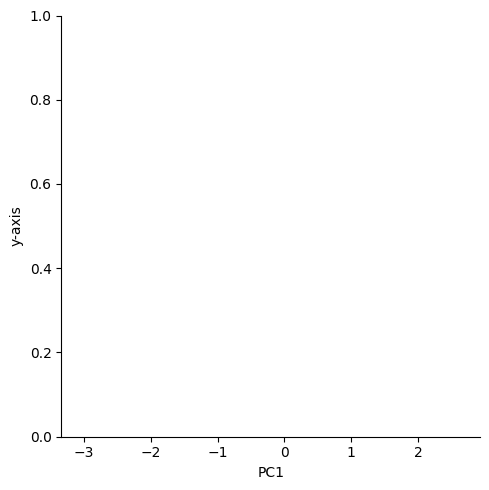

In [ ]:
from ast import increment_lineno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot(x='PC1',y='y-axis',data=result, fit_reg=False,scatter_kws={"S":50},
           hue="label")
plt.title('PCA result')